In [1]:
import numpy as np
from apprenticheshiplearning.utils.gridworld import plot_gridworld, plot_cost_function, plot_occupation, sanity_check, plot_policy
from apprenticheshiplearning.problems.gridworld import GridWorld
from apprenticheshiplearning.classes.solver import SolverMdp, SolverSMD

### Setting

In [2]:
# Parameters
n = 20
wind_intensity = 0.4 # between 0 and 1
gamma = 0.7

In [3]:
grid = np.zeros((n, n))
goal = [                    
        [n-1, n-2], 
        [n-1]
        ]
obstacles = [
                [i for  i in range(0,int(n/1.2))],
                [int(n/2)]
                
            ]
actions = ["up", "down", "left", "right"]
init_dist = np.ones((n,n))/(n**2)

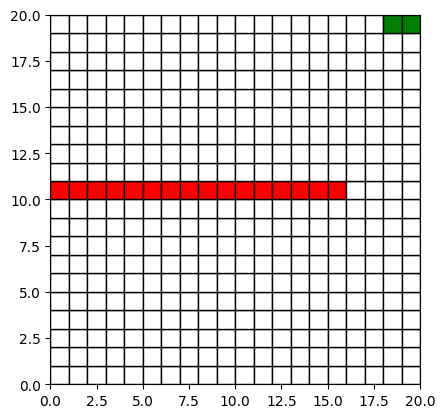

In [4]:
plot_gridworld(grid, obstacles, goal)

In [5]:
def transitions(s1, s , a, goal, n, wind_intensity): #go from s to s1 with action a
    if a == "up":
        if s[0] in goal[0] and s[1] in goal[1]:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] != 0 and s[1] == n - 1:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 1 and s1[1] == s[1]:
                return wind_intensity
            else:
                return 0
        elif s[0] == 0 and s[1] == n - 1:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] == 0 and s[1] < n - 1:
            if s1[0] == s[0] and s1[1] == s[1] + 1:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0] and s1[1] == s[1] + 1:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 1 and s1[1] == s[1] + 1:
                return wind_intensity
            else:
                return 0
            
    if a == "down":
        if s[0] in goal[0] and s[1] in goal[1]:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] != 0 and s[1] == 0:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 1 and s1[1] == s[1]:
                return wind_intensity
            else:
                return 0
        elif s[0] == 0 and s[1] == 0:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] == 0 and s[1] > 0:
            if s1[0] == s[0] and s1[1] == s[1] - 1:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0] and s1[1] == s[1] - 1:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 1 and s1[1] == s[1] - 1:
                return wind_intensity
            else:
                return 0

    if a == "left":
        if s[0] in goal[0] and s[1] in goal[1]:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] == 0:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] == 1:
            if s1[0] == s[0] - 1 and s1[1] == s[1]:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0] - 1 and s1[1] == s[1]:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 2 and s1[1] == s[1]:
                return wind_intensity
            else:
                return 0

    if a == "right":
        if s[0] in goal[0] and s[1] in goal[1]:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] == n - 1:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0] + 1 and s1[1] == s[1]:
                return 1 - wind_intensity
            elif s1[0] == s[0] and s1[1] == s[1]:
                return wind_intensity
            else:
                return 0

def cost(s, a, goal, obstacles):
    r = 0
    if s[0] in obstacles[0] and s[1] in obstacles[1]:
        r = 1
    elif s[0] in goal[0] and s[1] in goal[1]:
        r = -1
    return r

In [6]:
gridworld = GridWorld(grid, obstacles, goal, wind_intensity, actions, init_dist, gamma)
gridworld.get_mdp_forward()

In [7]:
for s in range(n**2):
    for a in range(4):
        if sum(gridworld.P[:,s,a]) != 1:
            grid_s = gridworld.S_to_grid[s]
            ac = actions[a]
            print("Error in state ", grid_s, " and action ", ac, "------------- Sum of probabilities: ", sum(gridworld.P[:,s,a]))
            print(gridworld.P[:,s,a])

### Forward 

In [8]:
gridworld = GridWorld(grid, obstacles, goal, wind_intensity, actions, init_dist, gamma)
gridworld.get_mdp_forward()
gridworld.mdp_forward.build_T()
solver_expert = SolverMdp(gridworld.mdp_forward)
prob, mu_e = solver_expert.solve()

                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Dec 02 10:33:48 PM: Your problem has 1600 variables, 2000 constraints, and 0 parameters.
(CVXPY) Dec 02 10:33:48 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 02 10:33:48 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 02 10:33:48 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Dec 02 10:33:48 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Dec 02 10:33:48 PM: Compiling problem (target solver=CLARAB

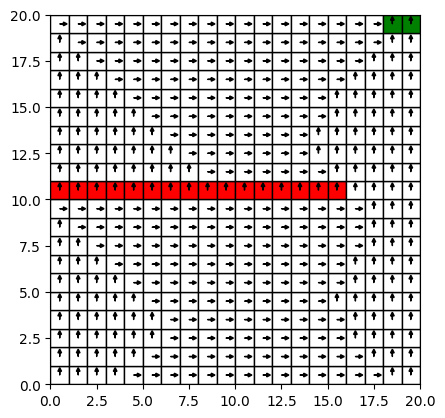

In [9]:
policy_e = gridworld.mdp_forward.get_policy_from_mu(mu_e.value)
visualize_policy = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        visualize_policy[i,j] = np.argmax(policy_e[gridworld.grid_to_S[i, j]])

plot_policy(grid, visualize_policy, obstacles, goal)

In [10]:
mu_expert = mu_e.value

In [11]:
mu_e.value

array([ 2.71850381e-03,  5.32144053e-03,  7.05734182e-03, ...,
       -1.04249701e-10, -1.09078924e-10,  3.59195407e-03])

In [12]:
mu_expert = np.maximum(mu_expert, 0)
mu_expert = mu_expert/np.sum(mu_expert)

In [13]:
mu_expert

array([0.00081555, 0.00159643, 0.0021172 , ..., 0.        , 0.        ,
       0.00107759])

### SMD

In [14]:
def get_step_size(S, A, gamma, alpha, epsilon):
    v_cu = 32 * alpha * S * A + (16 * (1 - gamma)**2 - 8 * alpha * (1 - gamma)**2 + 2 * (1 + gamma**2) * (1 + (1 - alpha)**2)) / (1 - gamma)**2
    v_mu = S * A * (2 + 4*(1 + gamma**2) / (1 - gamma)**2)
    eta_cu = epsilon / (4 * v_cu)
    eta_mu = epsilon / (4 * v_mu)
    return eta_cu, eta_mu

In [15]:
# every tile is penalized but the goal
c_hat = np.ones(n**2 * len(actions))*0.2
for i in range(len(goal[0])):
    for j in range(len(goal[1])):
        for a in range(len(actions)):
            s = gridworld.grid_to_S[goal[0][i], goal[1][j]]
            c_hat[gridworld.get_indexing(s, a)] = -1

c_hat = np.random.uniform(-1, 1, n**2 * len(actions))
alpha = 0
mu_e = mu_expert
c_0 = np.zeros(n**2 * len(actions))
u_0 = np.zeros(n**2)
mu_0 = np.ones(n**2 * len(actions)) / (n**2 * len(actions))
step_size = get_step_size(n**2, len(actions), gamma, alpha, 0.1)
T = 100000

In [16]:
c_hat

array([ 0.52821486,  0.55153806,  0.22039801, ...,  0.57054286,
       -0.07529492, -0.99001767])

In [17]:
step_size

(0.00030405405405405415, 2.2903094462540727e-07)

In [20]:
solver_smd = SolverSMD(gridworld, c_hat, alpha, mu_e, c_0, u_0, mu_0, 1e-2, 1e-2, T)

In [21]:
c, u, mu = solver_smd.solve_expected(10, True)

Simulation 1/10
Simulation 2/10
Simulation 3/10
Simulation 4/10
Simulation 5/10
Simulation 6/10
Simulation 7/10
Simulation 8/10
Simulation 9/10
Simulation 10/10


In [22]:
np.abs(np.round(mu - mu_e, 1))

array([0., 0., 0., ..., 0., 0., 0.])

In [23]:
c

array([-0.77884697, -0.76427779, -0.74885336, ..., -0.97419382,
        0.90172008,  0.42282709])

In [24]:
gridworld.mdp_forward.c

array([ 0.,  0.,  0., ...,  0.,  0., -1.])

In [25]:
np.abs(np.round(c - c_hat, 1))

array([1.3, 1.3, 1. , ..., 1.5, 1. , 1.4])

In [26]:
np.abs(np.round(gridworld.mdp_forward.c - c, 1))

array([0.8, 0.8, 0.7, ..., 1. , 0.9, 1.4])

In [27]:
mu_e @ gridworld.mdp_forward.c

np.float64(-0.009606092761886606)

In [28]:
mu @ gridworld.mdp_forward.c

np.float64(0.06858567050008095)

In [29]:
mu @ c

np.float64(-0.26049950969056995)

In [30]:
c_true = np.zeros((n, n, len(actions)))
for i in range(len(gridworld.mdp_forward.c)):
    c_true[gridworld.S_to_grid[i % n**2][0], 
                    gridworld.S_to_grid[i % n**2][1], 
                    int(i / n**2)
                    ] = gridworld.mdp_forward.c[i]


UP


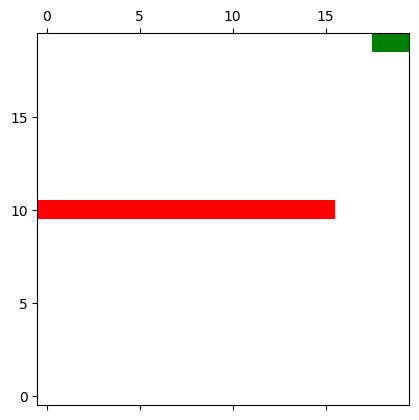

DOWN


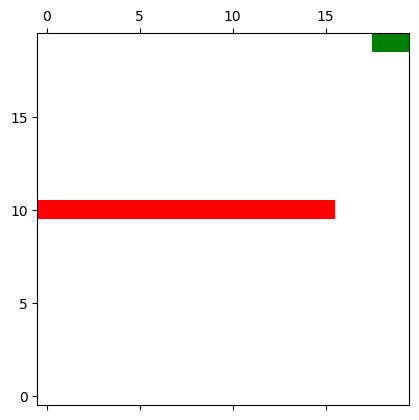

LEFT


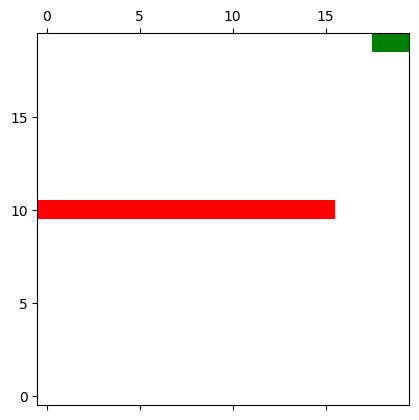

RIGHT


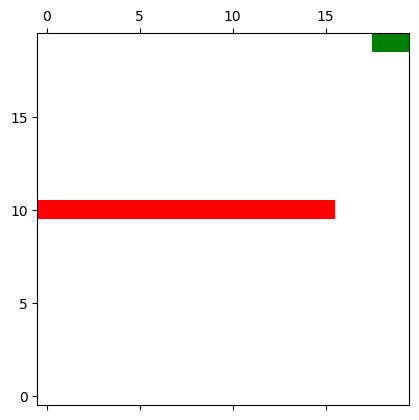

In [31]:
print("UP")
plot_cost_function(c_true[:, :, 0])
print("DOWN")
plot_cost_function(c_true[:, :, 1])
print("LEFT")
plot_cost_function(c_true[:, :, 2])
print("RIGHT")
plot_cost_function(c_true[:, :, 3])

In [32]:
c_reconstructed = np.zeros((n, n, len(actions)))
for i in range(len(c)):    
    c_reconstructed[gridworld.S_to_grid[i % n**2][0], 
                    gridworld.S_to_grid[i % n**2][1], 
                    int(i / n**2)
                    ] = c[i]

UP


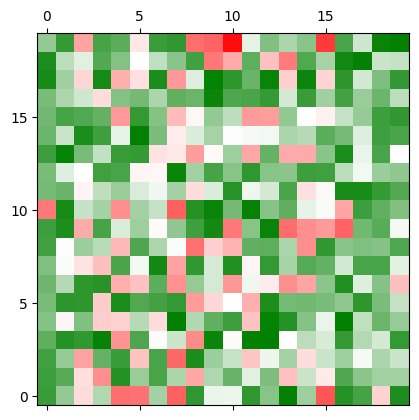

DOWN


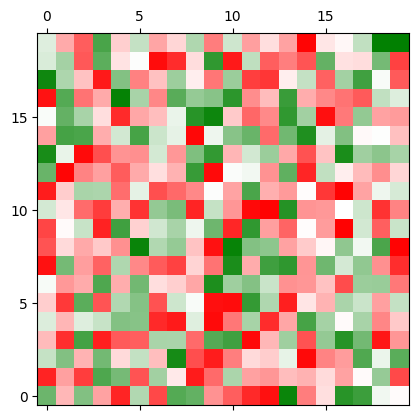

LEFT


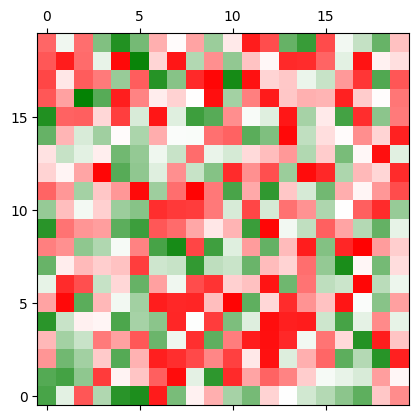

RIGHT


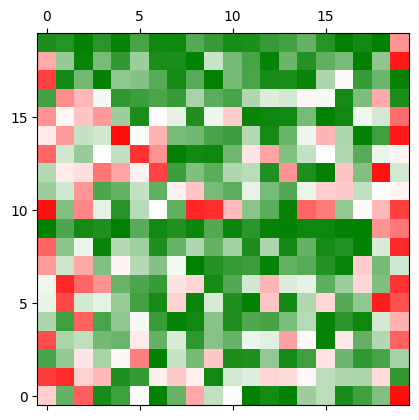

In [33]:
print("UP")
plot_cost_function(c_reconstructed[:, :, 0])
print("DOWN")
plot_cost_function(c_reconstructed[:, :, 1])
print("LEFT")
plot_cost_function(c_reconstructed[:, :, 2])
print("RIGHT")
plot_cost_function(c_reconstructed[:, :, 3])

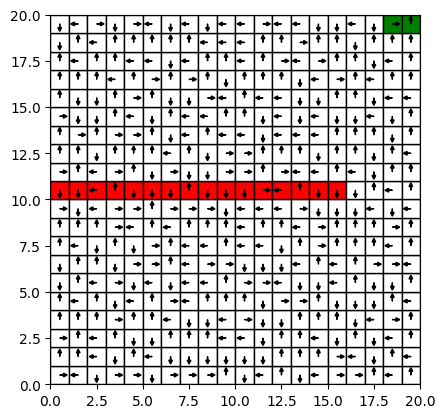

In [34]:
policy_e = gridworld.mdp_forward.get_policy_from_mu(mu)
visualize_policy = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        visualize_policy[i,j] = np.argmax(policy_e[gridworld.grid_to_S[i, j]])

plot_policy(grid, visualize_policy, obstacles, goal)

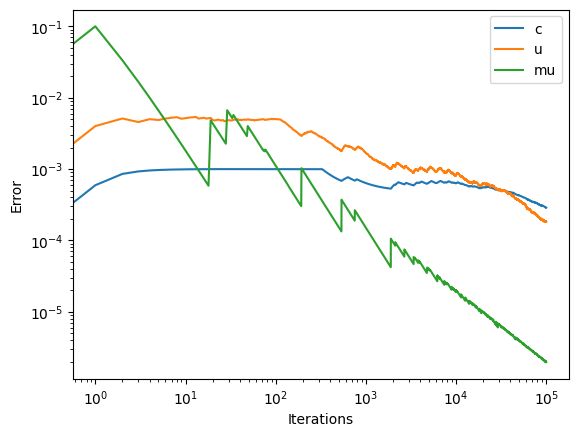

In [35]:
# plot the following list against its axis
import matplotlib.pyplot as plt
plt.plot(solver_smd.c_iter)
plt.plot(solver_smd.u_iter)
plt.plot(solver_smd.mu_iter)
plt.yscale('log')
plt.xscale('log')
#add labels
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend(['c', 'u', 'mu'])
plt.show()
